In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import numpy as np
from scipy.stats import ttest_ind, norm

In [2]:
# Load file
rio_listing = pd.read_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\rio_listings.csv', encoding='utf-8')
rio_listing.describe()


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.466400e+04,3.466400e+04,3.466400e+04,34664.000000,34664.000000,0.0,34664.000000,34664.000000,34664.000000,33824.000000,...,26209.000000,26209.000000,26209.000000,26207.000000,0.0,34664.000000,34664.000000,34664.000000,34664.000000,26218.000000
mean,5.590520e+17,2.024060e+13,1.979962e+08,17.522011,29.340497,NaN,-22.967415,-43.248751,4.014828,1.551842,...,4.891008,4.880754,4.864992,4.719634,NaN,9.070909,8.235951,0.708891,0.120846,1.086423
std,4.785128e+17,0.000000e+00,1.898936e+08,95.340481,151.079569,NaN,0.034793,0.099478,2.337222,1.007230,...,0.284292,0.298894,0.291940,0.406434,NaN,24.042257,23.938462,1.851507,0.985730,1.195325
min,1.787800e+04,2.024060e+13,3.607000e+03,1.000000,1.000000,NaN,-23.073276,-43.723009,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.616128e+07,2.024060e+13,2.714992e+07,1.000000,1.000000,NaN,-22.984610,-43.303282,2.000000,1.000000,...,4.890000,4.880000,4.850000,4.640000,NaN,1.000000,1.000000,0.000000,0.000000,0.230000
50%,7.271245e+17,2.024060e+13,1.130967e+08,2.000000,3.000000,NaN,-22.972840,-43.194384,4.000000,1.000000,...,5.000000,5.000000,4.970000,4.820000,NaN,2.000000,1.000000,0.000000,0.000000,0.670000
75%,1.027122e+18,2.024060e+13,3.710267e+08,6.000000,8.000000,NaN,-22.956465,-43.185429,5.000000,2.000000,...,5.000000,5.000000,5.000000,5.000000,NaN,5.000000,3.000000,1.000000,0.000000,1.540000
max,1.187210e+18,2.024060e+13,5.856746e+08,2637.000000,6430.000000,NaN,-22.749950,-43.104400,16.000000,29.000000,...,5.000000,5.000000,5.000000,5.000000,NaN,200.000000,200.000000,23.000000,19.000000,16.960000


In [2]:

# Drop rows where 'price' is NaN
rio_listing = rio_listing.dropna(subset=['price'])

# Filter listings with at least 30 reviews
filtered_listings = rio_listing[rio_listing['number_of_reviews'] >= 30]

# Extract the top 100 listings with the highest review scores from the filtered data
top_100_listings = filtered_listings.sort_values(by='review_scores_rating', ascending=False).head(100)

# Select relevant columns
top_listing_ids = top_100_listings['id']
top_listing_prices = top_100_listings['price']
top_review_scores = top_100_listings['review_scores_rating']

# Convert prices to SGD
brl_to_sgd = 0.24 
top_rio_listing_prices_sgd = (top_listing_prices * brl_to_sgd).round(2)

top_100_listings['price_sgd'] = (top_100_listings['price'] * brl_to_sgd).round(2)
top_100_listings.to_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\top_100_rio_listings.csv', index=False)

print("Data saved to top_100_rio_listings.csv")

# Convert columns to lists for iteration
top_listing_ids_list = top_listing_ids.tolist()
top_rio_listing_prices_list = top_rio_listing_prices_sgd.tolist()
top_review_scores_list = top_review_scores.tolist()

# Print out listing information including review scores rating
for listing_id, price_sgd, review_score in zip(top_listing_ids_list, top_rio_listing_prices_list, top_review_scores_list):
    # Get the number of reviews for each listing ID
    num_reviews = rio_listing.loc[rio_listing['id'] == listing_id, 'number_of_reviews'].values[0]
    price = rio_listing.loc[rio_listing['id'] == listing_id, 'price'].values[0]
    print(f"Listing ID: {listing_id}, Number of Reviews: {num_reviews}, Price (SGD): {price_sgd}, Review Score: {review_score}")


Data saved to top_100_rio_listings.csv
Listing ID: 6.66658e+17, Number of Reviews: 42, Price (SGD): 122.16, Review Score: 5.0
Listing ID: 30794887.0, Number of Reviews: 37, Price (SGD): 28.8, Review Score: 5.0
Listing ID: 30578729.0, Number of Reviews: 35, Price (SGD): 65.76, Review Score: 5.0
Listing ID: 5.54021e+17, Number of Reviews: 90, Price (SGD): 69.6, Review Score: 5.0
Listing ID: 8518227.0, Number of Reviews: 33, Price (SGD): 24.0, Review Score: 5.0
Listing ID: 7.7985e+17, Number of Reviews: 44, Price (SGD): 61.92, Review Score: 5.0
Listing ID: 8.68942e+17, Number of Reviews: 53, Price (SGD): 82.32, Review Score: 5.0
Listing ID: 11232006.0, Number of Reviews: 36, Price (SGD): 16.32, Review Score: 5.0
Listing ID: 30884316.0, Number of Reviews: 33, Price (SGD): 240.0, Review Score: 5.0
Listing ID: 8.70377e+17, Number of Reviews: 40, Price (SGD): 43.2, Review Score: 5.0
Listing ID: 11237490.0, Number of Reviews: 113, Price (SGD): 38.4, Review Score: 5.0
Listing ID: 7.72423e+17, N

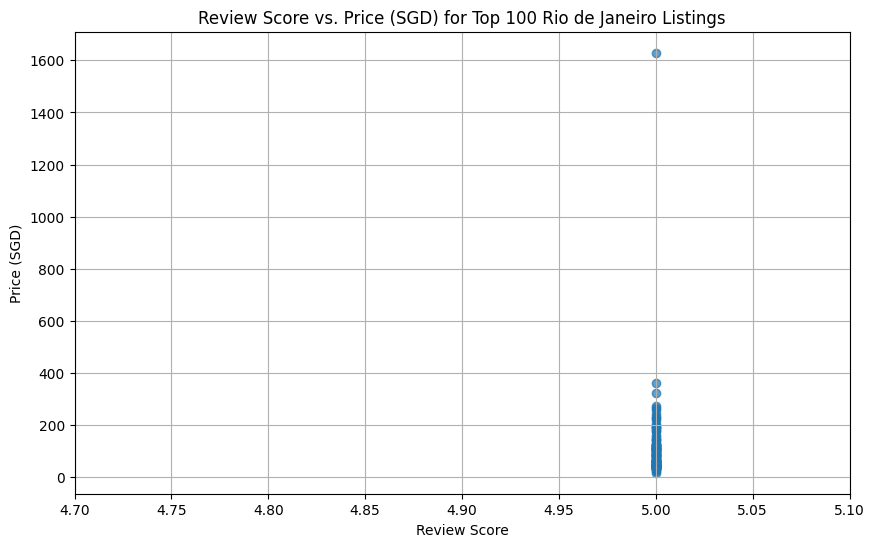

In [3]:

plt.figure(figsize=(10, 6))
plt.scatter(top_review_scores_list, top_rio_listing_prices_list, alpha=0.7)
plt.title('Review Score vs. Price (SGD) for Top 100 Rio de Janeiro Listings')
plt.xlabel('Review Score')
plt.ylabel('Price (SGD)')
plt.xlim(left=4.7, right=5.1)  
plt.grid(True)
plt.show()


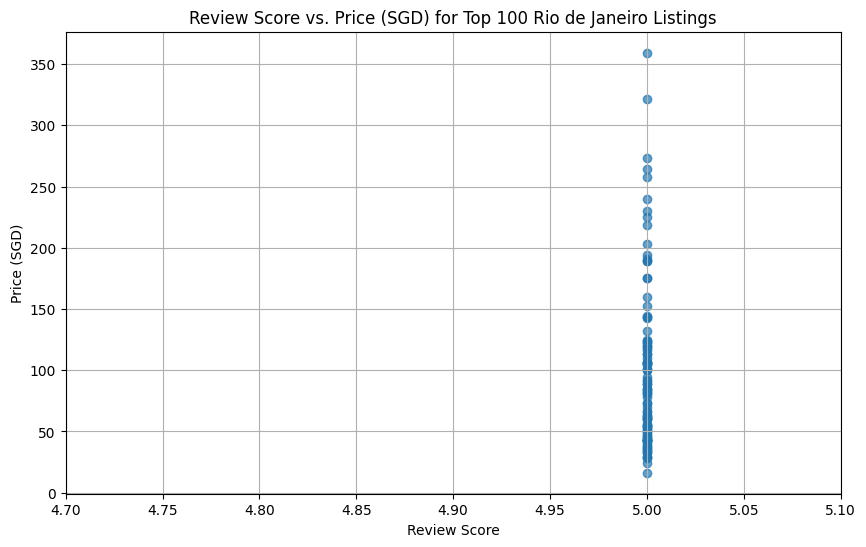

In [4]:
filtered_prices = [price for price in top_rio_listing_prices_list if price < 1000]
filtered_scores = [score for price, score in zip(top_rio_listing_prices_list, top_review_scores_list) if price < 1000]


plt.figure(figsize=(10, 6))
plt.scatter(filtered_scores, filtered_prices, alpha=0.7)
plt.title('Review Score vs. Price (SGD) for Top 100 Rio de Janeiro Listings')
plt.xlabel('Review Score')
plt.ylabel('Price (SGD)')
plt.xlim(left=4.7, right=5.1)  
plt.grid(True)
plt.show()

In [5]:
# Extract the bottom 100 listings with the lowest review scores from the filtered data
bottom_100_listings = filtered_listings.sort_values(by='review_scores_rating', ascending=True).head(100)

# Select relevant columns
bottom_listing_ids = bottom_100_listings['id']
bottom_listing_prices = bottom_100_listings['price']
bottom_review_scores = bottom_100_listings['review_scores_rating']

# Convert prices to SGD
bottom_rio_listing_prices_sgd = (bottom_listing_prices * brl_to_sgd).round(2)

bottom_100_listings['price_sgd'] = (bottom_100_listings['price'] * brl_to_sgd).round(2)
bottom_100_listings.to_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\bottom_100_rio_listings.csv', index=False)

print("Data saved to bottom_100_rio_listings.csv")

# Convert columns to lists for iteration
bottom_listing_ids_list = bottom_listing_ids.tolist()
bottom_rio_listing_prices_list = bottom_rio_listing_prices_sgd.tolist()
bottom_review_scores_list = bottom_review_scores.tolist()

# Print out listing information including review scores rating
for listing_id, price_sgd, review_score in zip(bottom_listing_ids_list, bottom_rio_listing_prices_list, bottom_review_scores_list):
    # Get the number of reviews for each listing ID
    num_reviews = rio_listing.loc[rio_listing['id'] == listing_id, 'number_of_reviews'].values[0]
    price = rio_listing.loc[rio_listing['id'] == listing_id, 'price'].values[0]
    print(f"Listing ID: {listing_id}, Number of Reviews: {num_reviews}, Price (SGD): {price_sgd}, Review Score: {review_score}")


Data saved to bottom_100_rio_listings.csv
Listing ID: 6.68106e+17, Number of Reviews: 36, Price (SGD): 52.8, Review Score: 3.92
Listing ID: 6.7081e+17, Number of Reviews: 36, Price (SGD): 55.68, Review Score: 3.94
Listing ID: 20724890.0, Number of Reviews: 49, Price (SGD): 58.32, Review Score: 4.1
Listing ID: 9.52832e+17, Number of Reviews: 32, Price (SGD): 61.2, Review Score: 4.13
Listing ID: 52423540.0, Number of Reviews: 38, Price (SGD): 124.8, Review Score: 4.16
Listing ID: 52144075.0, Number of Reviews: 35, Price (SGD): 97.92, Review Score: 4.17
Listing ID: 2098970.0, Number of Reviews: 49, Price (SGD): 43.2, Review Score: 4.18
Listing ID: 7.05475e+17, Number of Reviews: 31, Price (SGD): 33.36, Review Score: 4.19
Listing ID: 2547262.0, Number of Reviews: 58, Price (SGD): 152.4, Review Score: 4.19
Listing ID: 23077592.0, Number of Reviews: 96, Price (SGD): 65.04, Review Score: 4.2
Listing ID: 16553680.0, Number of Reviews: 44, Price (SGD): 146.16, Review Score: 4.2
Listing ID: 1190

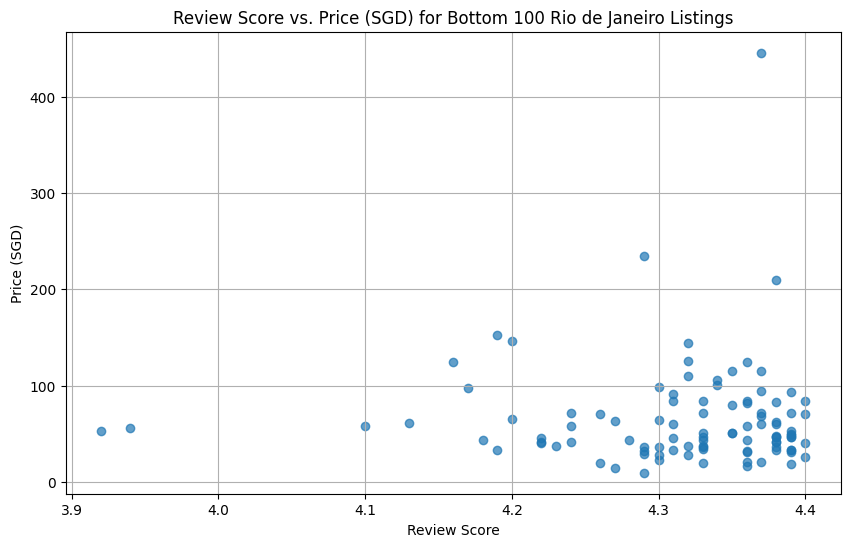

In [6]:
# Plot review score vs. price (SGD) for Paris listings
plt.figure(figsize=(10, 6))
plt.scatter(bottom_review_scores_list, bottom_rio_listing_prices_list, alpha=0.7)
plt.title('Review Score vs. Price (SGD) for Bottom 100 Rio de Janeiro Listings')
plt.xlabel('Review Score')
plt.ylabel('Price (SGD)')
plt.grid(True)
plt.show()


In [7]:
# Load the two CSV files into DataFrames
top_100 = pd.read_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\top_100_rio_listings.csv')
bottom_100 = pd.read_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\bottom_100_rio_listings.csv')

# Concatenate the two DataFrames
top_bottom_100 = pd.concat([top_100, bottom_100], ignore_index=True)

# Save the combined DataFrame to a new CSV file
top_bottom_100.to_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\combined_top_bottom_rio_listings.csv', index=False)

print("Data saved to combined_top_bottom_rio_listings.csv")

Data saved to combined_top_bottom_rio_listings.csv


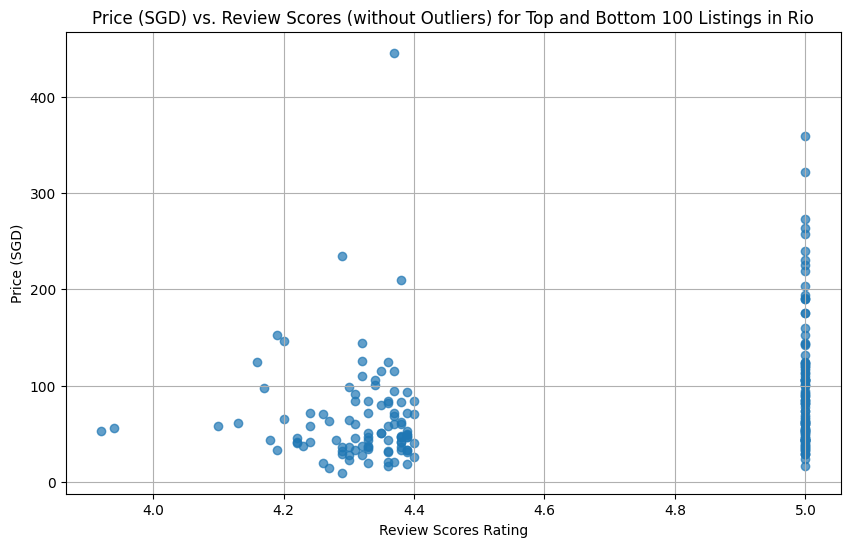

In [3]:
top_bottom_rio_100 = pd.read_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\combined_top_bottom_rio_listings.csv')
filtered_data = top_bottom_rio_100[top_bottom_rio_100['price_sgd'] < 1000]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['review_scores_rating'], filtered_data['price_sgd'], alpha=0.7)
plt.title('Price (SGD) vs. Review Scores (without Outliers) for Top and Bottom 100 Listings in Rio')
plt.xlabel('Review Scores Rating')
plt.ylabel('Price (SGD)')
plt.grid(True)
plt.show()

In [4]:
# Define high and low review score groups (e.g., above 4.5 as high)
high_score_group = top_bottom_rio_100[top_bottom_rio_100['review_scores_rating'] > 4.5]['price_sgd']
low_score_group = top_bottom_rio_100[top_bottom_rio_100['review_scores_rating'] <= 4.5]['price_sgd']

# Perform the independent t-test
t_stat, p_value = ttest_ind(high_score_group, low_score_group, equal_var=False, alternative='two-sided')  # Using Welch's t-test
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average prices between high and low review score groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average prices between the groups.")


T-Statistic: 2.8929945321255954, P-Value: 0.004534731715512181
Reject the null hypothesis: There is a significant difference in average prices between high and low review score groups.


In [5]:
# Separate groups based on a review score threshold (e.g., 4.5)
high_score_group = top_bottom_rio_100[top_bottom_rio_100['review_scores_rating'] > 4.5]['price_sgd']
low_score_group = top_bottom_rio_100[top_bottom_rio_100['review_scores_rating'] <= 4.5]['price_sgd']

# Calculate means and standard deviations
mean_high_score = np.mean(high_score_group)
mean_low_score = np.mean(low_score_group)
std_high_score = np.std(high_score_group, ddof=1)  # sample standard deviation
std_low_score = np.std(low_score_group, ddof=1)    # sample standard deviation
n_high = len(high_score_group)
n_low = len(low_score_group)
alpha = 0.05

# Calculate the z-score
z_score = (mean_high_score - mean_low_score) / np.sqrt((std_high_score**2 / n_high) + (std_low_score**2 / n_low))

#calculate critical value
critical_value = stats.norm.ppf(1-alpha/2) 

# Calculate the p-value for a two-tailed test
p_value = 2 * stats.norm.sf(abs(z_score))

# Display results
print(f"Mean Price (High Score): {mean_high_score}")
print(f"Mean Price (Low Score): {mean_low_score}")
print(f"Z-Score: {z_score}")
print(f"P-Value: {p_value}")
print(f"Critical Value: {critical_value}")

# Interpretation
  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average prices between high and low review score groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average prices between the groups.")

Mean Price (High Score): 116.40240000000001
Mean Price (Low Score): 65.40960000000001
Z-Score: 2.8929945321255968
P-Value: 0.0038158794005088183
Critical Value: 1.959963984540054
Reject the null hypothesis: There is a significant difference in average prices between high and low review score groups.


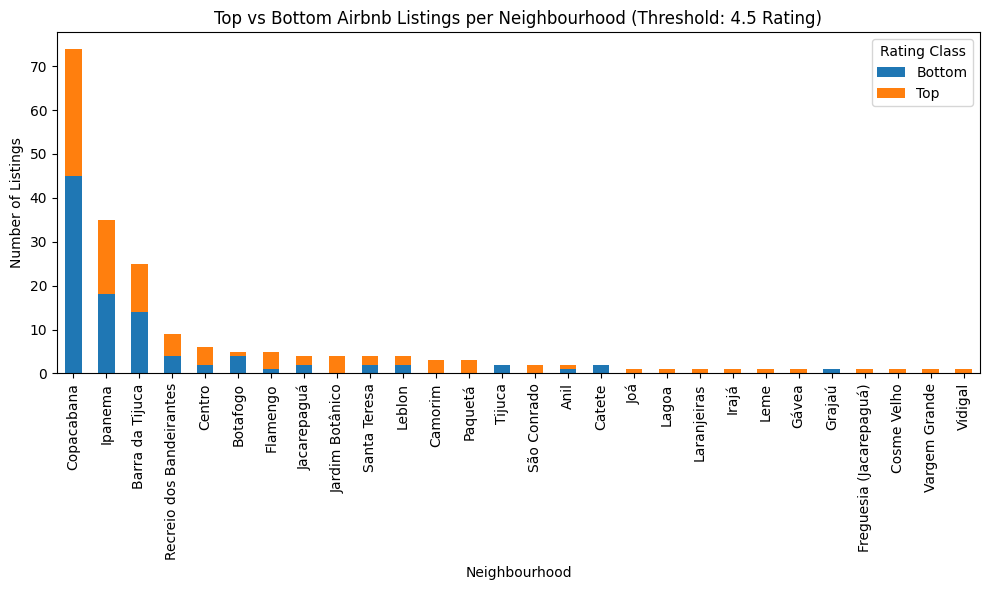

In [7]:
top_bottom_rio_100['Rating_Class'] = ['Top' if rating > 4.5 else 'Bottom' for rating in top_bottom_rio_100['review_scores_rating']]

# Group by neighbourhood and rating class to get counts
neighbourhood_counts = top_bottom_rio_100.groupby(['neighbourhood_cleansed', 'Rating_Class']).size().unstack(fill_value=0)

neighbourhood_counts['Total'] = neighbourhood_counts.sum(axis=1)
neighbourhood_counts = neighbourhood_counts.sort_values('Total', ascending=False).drop(columns='Total')

# Plotting
neighbourhood_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Top vs Bottom Airbnb Listings per Neighbourhood (Threshold: 4.5 Rating)')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.legend(title='Rating Class')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()